In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False # 한글폰트 사용시 마이너스 깨짐 방지


In [3]:
df = pd.read_csv('20221209_User Story.csv',index_col='ID')
df.drop(['Product ID','Sprint.1','Sprint ID','Assigned To ID','Assigned To Type','Workflow Step Order','Workflow Step ID','Story Estimate Minutes','Unnamed: 17'],axis=1, inplace=True)
df['Story Estimate'] = df['Story Estimate'].str.replace('points', '')
df['Story Estimate'] = df['Story Estimate'].str.replace('hrs', '')
df['Story Estimate'] = df['Story Estimate'].str.replace('hours', '')
df['Story Estimate'] = df['Story Estimate'].str.replace('point', '')
df['Story Estimate'] = df['Story Estimate'].astype(int)
#df.dropna(axis='columns',inplace=True)
df

,Product,Sprint,Title,Assigned To,Workflow Step,Story Estimate,Item Type,Created Date
ID,,,,,,,,
39830,Cheonan Software,3'rd Kanban,Sean's Handover,Sean Pyeon,In Progress,0,User Story,30/11/2022 01:16:20
39835,Cheonan Software,3'rd Kanban,Presentation EUV Gen2/Gen3 PLC Software,Sean Pyeon,Committed,0,Task,30/11/2022 01:20:58
39834,Cheonan Software,3'rd Kanban,Presentation EUV ReGIS Mk3 Lead Eng. Role,Sean Pyeon,Committed,0,Task,30/11/2022 01:20:00
39833,Cheonan Software,3'rd Kanban,Presentation EUV Gen2/Gen3 Lead Eng. Role,Sean Pyeon,Committed,0,Task,30/11/2022 01:19:36
39832,Cheonan Software,3'rd Kanban,Presentation EUV Gen2/Gen3 HMI and other software,Sean Pyeon,Committed,0,Task,30/11/2022 01:19:24
...,...,...,...,...,...,...,...,...
37086,ReGIS TD,1.0.0,ReGIS TD : Define ReGIS Module and define Modu...,Roy Choi,Product Backlog,4,Spike,12/08/2022 09:15:47
35629,ReGIS TD,1.0.0,ReGIS : Write a Control Narrative/Philosophy t...,NaN,Product Backlog,4,User Story,14/06/2022 12:14:22
35628,ReGIS TD,1.0.0,REGIS : HMI Control and Structure / Optimize H...,NaN,Product Backlog,4,User Story,14/06/2022 12:11:49


In [4]:

pcca = df.loc[df['Item Type'] != 'Task' ]
pcca.groupby(['Product','Workflow Step']).sum()

Story Estimate
Product               Workflow Step                       
Cheonan Software      In Progress                        0
DAISE (Proxima)       In Progress                        2
                      Product Backlog                  168
                      Ready for Sign-Off                 4
EUV Zenith            Committed                          0
                      Done                               4
                      In Progress                       33
                      Product Backlog                  296
                      Ready for Sign-Off                 4
H2D                   Committed                          8
                      Done                               6
                      Product Backlog                   44
Module ValidationBox  Committed                          0
                      Product Backlog                    8
                      Ready for Sign-Off                16
PLC Platform Software Product Backlog                  137
Proton Alpha(NGP)     Committed                          0
                      Done                               6
                      In Progress                       14
                      Product Backlog                  132
                      Ready for Sign-Off                 4
ReGIS MK3             Blocked                            2
                      Committed                          4
                      Done                               2
                      In Progress                        9
                      Product Backlog                   28
ReGIS TD              In Progress                        4
                      Product Backlog                   60
                      Ready for QA Testing              14
TEL Probus SIC        Committed                          1

## ReGIS TD Project

<AxesSubplot:ylabel='Story Estimate'>

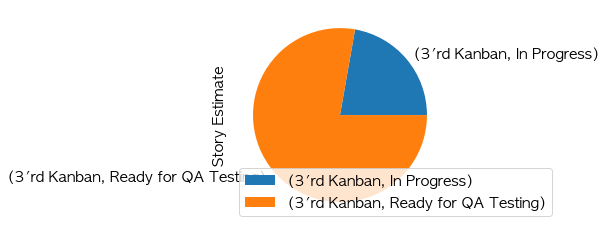

In [38]:

regis_td = df.loc[df['Product'] == 'ReGIS TD']
regis_td = regis_td.loc[df['Sprint'] != '1.0.0']
regis_td = regis_td.loc[df['Item Type'] != 'Task' ]
regis_td_group = regis_td.groupby(['Sprint','Workflow Step']).sum()
regis_td_group.plot(kind='pie', y='Story Estimate')

In [68]:
regis_td_group.T.columns.droplevel(0).T


Story Estimate
Sprint      Workflow Step                       
3'rd Kanban In Progress                        4
            Ready for QA Testing              14

In [69]:
regis_td_sum['Story Estimate']

Sprint       Workflow Step       
1.0.0        Product Backlog         60
3'rd Kanban  In Progress              4
             Ready for QA Testing    14
Name: Story Estimate, dtype: int64

In [13]:
plt.pie(values, labels=labels, autopct = '%.1f%%', startangle=90, counterclock=False)
plt.show()
plt.pie(regis_td_sum['Stroy Estimate'])



NameError: name 'values' is not defined

### DAISE Project

In [68]:
daise = df.loc[df['Product'] == 'DAISE (Proxima)']
daise = daise.loc[df['Item Type'] != 'Task' ]
daise.groupby(['Sprint','Workflow Step']).sum()

Story Estimate
Sprint        Workflow Step                     
1.2.0         In Progress                      2
              Product Backlog                 32
1.3.0         Product Backlog                 72
2023.Q3       Product Backlog                 64
3'rd Kanban   In Progress                      0
              Ready for Sign-Off               4
PLC Plaftform Product Backlog                  0